In [1]:
# py27 compatability
from __future__ import print_function
from __future__ import division
# load packages
import numpy as np                                          # advanced array functions
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # plotting
# configure matplotlib
%matplotlib inline
import seaborn as sns                                       # statistics / plotting
sns.set(style="ticks", font_scale=1.25)
import sspals

## Model SSPALS spectra

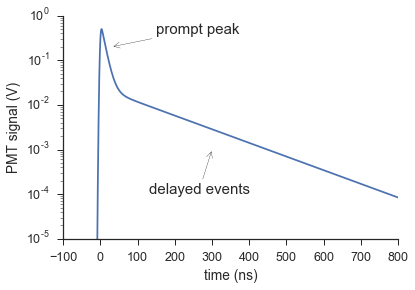

In [2]:
# time
dt = 1e-10
x_vals = np.arange(-2e-8, 8e-7, dt)
# PMT signal
y_vals = sspals.sim(x_vals, amp=0.5, sigma=2.0E-9, eff=0.3, tau=1.420461e-7, kappa=10e-9)
# plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_vals*1e9, y_vals)
ax.set_yscale('log')
ax.set_ylim(0.00001,1)
ax.set_ylabel('PMT signal (V)')
ax.set_xlabel('time (ns)')

# annotations
ax.annotate('prompt peak', xy=(30, 0.2), xytext=(150, 0.4),
            arrowprops=dict(arrowstyle="->")
            )
ax.annotate('delayed events', xy=(300, 0.001), xytext=(130, 0.0001),
            arrowprops=dict(arrowstyle="->")
            )

# format
sns.despine()

#output
plt.savefig("../images/pwo.pdf", dpi=200, bbox_inches='tight')
plt.show()

In [3]:
# simplified delayed fraction (A/C = +/- inf)
def delayed_fraction(xdata, ydata, B):
    idx = (np.abs(xdata - B)).argmin()
    return ydata[idx:].sum()/ ydata.sum()

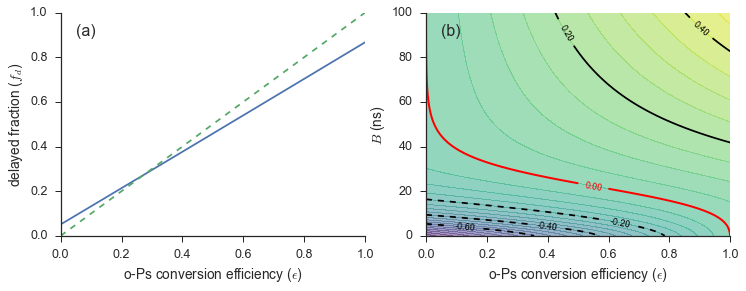

In [4]:
# plotting
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# (a) delayed fraction
B = 3e-8
dfrac = []
eff_vals = np.arange(0.0, 1.001, 0.01)
for eff in eff_vals:
    y_vals = sspals.sim(x_vals, amp=0.5, sigma=2.0E-9, eff=eff, tau=1.420461e-7, kappa=10e-9)
    dfrac.append(delayed_fraction(x_vals, y_vals, B))
s1 = pd.Series(dfrac, index=eff_vals)
## plot
ax[0].plot(s1)
ax[0].plot(eff_vals, eff_vals, '--')
ax[0].set_ylabel('delayed fraction ($f_d$)')
ax[0].set_xlabel('o-Ps conversion efficiency ($\epsilon$)')

# (b) difference between eff and dfrac
all_diff = []
B_vals = np.arange(0.0, 1.01e-7, 1.0e-9)
for eff in eff_vals:
    y_vals = sspals.sim(x_vals, amp=0.5, sigma=2.0E-9, eff=eff, tau=1.420461e-7, kappa=10e-9)
    diff = []
    for B in B_vals:
        diff.append(eff - delayed_fraction(x_vals, y_vals, B))
    all_diff.append(diff)
all_diff = np.array(all_diff).T

## contour plot
X, Y = np.meshgrid(eff_vals, B_vals * 1e9)
CSC = ax[1].contourf(X, Y, all_diff, np.arange(-1, 0.6, 0.05), alpha=0.5, cmap='viridis')
CS = ax[1].contour(X, Y, all_diff, levels=[-0.6, -0.4, -0.2, 0.2, 0.4], vmin=-1, vmax=1.0, colors='k')
CS0 = ax[1].contour(X, Y, all_diff, levels=[0], vmin=-1, vmax=1, colors='r', linewidths=(2,))
ax[1].clabel(CS, fontsize=9, inline=1, fmt='%.2f')
ax[1].clabel(CS0, fontsize=9, inline=1, fmt='%.2f')
ax[1].set_ylabel('$B$ (ns)')
ax[1].set_xlabel('o-Ps conversion efficiency ($\epsilon$)')

# format
ax[0].annotate('(a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=16)
ax[1].annotate('(b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=16)
sns.despine()

# output
plt.savefig("../images/B_val.pdf", dpi=200, bbox_inches='tight')
plt.show()